In [2]:
import datetime as dt
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

In [3]:
# read function csv
def read_csv(file_name):
    df = pd.read_csv(file_name, index_col=0)

    return df

df = read_csv('DOGE-VOLUME-filtered.csv')
df['date_timestamp'] = df['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [48]:
# Sort by date
df = df.sort_values(by='date_timestamp')

#rename time colum to date
df.rename(columns={'time': 'date'}, inplace=True)

# filter df between 2022-01-13 17:00:00 and 2022-01-14 18:00:00
df = df[(df['date_timestamp'] >= dt.datetime(2022, 1, 13, 17, 0, 0)) & (df['date_timestamp'] <= dt.datetime(2022, 1, 14, 22, 0, 0))]

# initialise MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# min max scaler volume column 
df['volume_norm'] = scaler.fit_transform(df['volume'].values.reshape(-1, 1))

print(df.head())
print(df.tail())
print(len(df))

                     date        volume      date_timestamp  volume_norm
1609  2022-01-13 17:00:00  1.543509e+10 2022-01-13 17:00:00     1.000000
1610  2022-01-13 18:00:00  9.017789e+09 2022-01-13 18:00:00     0.360215
1611  2022-01-13 19:00:00  1.064819e+10 2022-01-13 19:00:00     0.522761
1612  2022-01-13 20:00:00  1.183833e+10 2022-01-13 20:00:00     0.641414
1613  2022-01-13 21:00:00  7.230919e+09 2022-01-13 21:00:00     0.182069
                     date        volume      date_timestamp  volume_norm
1634  2022-01-14 18:00:00  6.195838e+09 2022-01-14 18:00:00     0.078875
1635  2022-01-14 19:00:00  7.015558e+09 2022-01-14 19:00:00     0.160598
1636  2022-01-14 20:00:00  5.876676e+09 2022-01-14 20:00:00     0.047055
1637  2022-01-14 21:00:00  6.272412e+09 2022-01-14 21:00:00     0.086509
1638  2022-01-14 22:00:00  5.404694e+09 2022-01-14 22:00:00     0.000000
30


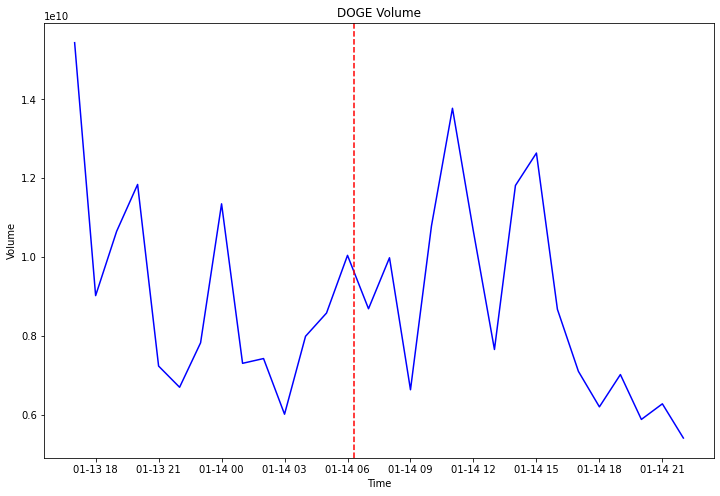

In [40]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df['date_timestamp'], df['volume'], color='blue', label='volume')
ax.axvline(x=datetime(2022, 1, 14, 6, 18), color='red', linestyle='--', label='14-01-2022 06:18')
# ax.axvline(x=datetime(2022, 1, 25, 12, 30), color='red', linestyle='--', label='25-01-2022 12:30')
ax.set_xlabel('Time')
ax.set_ylabel('Volume')
ax.set_title('DOGE Volume')
plt.show()

In [41]:
df_score = read_csv('DOGE-all_df.csv')
df_score.reset_index(inplace=True)
# Kepp date_timestamp, close_norm, compound_norm, score_norm
df_score = df_score[['date_timestamp', 'close_norm', 'compound_norm', 'score_norm', 'date_x']]

#rename date_x to date
df_score.rename(columns={'date_x': 'date'}, inplace=True)

# df_score['date_timestamp'] = df_score['date_timestamp'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M'))

print(len(df_score))

#print first and last date in df_score
print(df_score.head())
print(df_score.tail())

# print(df.head())

30
        date_timestamp  close_norm  compound_norm  score_norm  \
0  2022-01-13 17:00:00    0.005405       0.257976    0.719607   
1  2022-01-13 18:00:00    0.000000       0.057427    0.539362   
2  2022-01-13 19:00:00    0.008108       0.140812    0.846214   
3  2022-01-13 20:00:00    0.089189       0.149229    0.394478   
4  2022-01-13 21:00:00    0.216216       0.206971    0.467599   

               date  
0  2022-01-13 17:00  
1  2022-01-13 18:00  
2  2022-01-13 19:00  
3  2022-01-13 20:00  
4  2022-01-13 21:00  
         date_timestamp  close_norm  compound_norm  score_norm  \
25  2022-01-14 18:00:00    0.708108       0.407245    0.000356   
26  2022-01-14 19:00:00    0.672973       0.559039    0.000000   
27  2022-01-14 20:00:00    0.708108       1.000000    0.063314   
28  2022-01-14 21:00:00    0.732432       0.765405    0.006878   
29  2022-01-14 22:00:00    0.681081       0.946226    0.427294   

                date  
25  2022-01-14 18:00  
26  2022-01-14 19:00  
27  2022

In [ ]:
# merge df and df_score on date and date_timestamp inner join
df_merged = pd.merge(df, df_score, on=['date_timestamp', 'date_timestamp'], how='inner')

# df_merged = pd.merge(df, df_score, on='date', how='outer')

In [46]:
# print(df_merged.head())

In [29]:
df_merged = df_merged[['date_timestamp', 'volume', 'score']]

In [30]:
print(df_merged.head())

# initialise MinMaxScaler 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# normalise volume and score
df_merged['volume_norm'] = scaler.fit_transform(df_merged['volume'].values.reshape(-1, 1))
df_merged['score_norm'] = scaler.fit_transform(df_merged['score'].values.reshape(-1, 1))

print(df_merged.head())


       date_timestamp        volume         score
0 2022-01-30 00:00:00  9.460801e+09  2.999990e-07
1 2022-01-29 23:00:00  5.658370e+09 -2.225529e-07
2 2022-01-29 22:00:00  5.468148e+09  1.197643e-07
3 2022-01-29 21:00:00  7.932699e+09 -9.252055e-08
4 2022-01-29 20:00:00  1.393347e+10 -4.621335e-07
       date_timestamp        volume         score  volume_norm  score_norm
0 2022-01-30 00:00:00  9.460801e+09  2.999990e-07     0.087103    0.183646
1 2022-01-29 23:00:00  5.658370e+09 -2.225529e-07     0.013176    0.150283
2 2022-01-29 22:00:00  5.468148e+09  1.197643e-07     0.009478    0.172138
3 2022-01-29 21:00:00  7.932699e+09 -9.252055e-08     0.057394    0.158585
4 2022-01-29 20:00:00  1.393347e+10 -4.621335e-07     0.174061    0.134986


In [43]:
# sort df_merged by date_timestamp
df_merged = df_merged.sort_values(by='date_timestamp')

# keep lines after 2022-01-25 10:00:00
df_merged = df_merged[df_merged['date_timestamp'] > datetime(2022, 1, 25, 10, 0)]

In [51]:
df['date_timestamp'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df_score['date_timestamp'] = df_score['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M'))

print(df.head())
print(df_score.head())

                     date        volume      date_timestamp  volume_norm
1609  2022-01-13 17:00:00  1.543509e+10 2022-01-13 17:00:00     1.000000
1610  2022-01-13 18:00:00  9.017789e+09 2022-01-13 18:00:00     0.360215
1611  2022-01-13 19:00:00  1.064819e+10 2022-01-13 19:00:00     0.522761
1612  2022-01-13 20:00:00  1.183833e+10 2022-01-13 20:00:00     0.641414
1613  2022-01-13 21:00:00  7.230919e+09 2022-01-13 21:00:00     0.182069
       date_timestamp  close_norm  compound_norm  score_norm              date
0 2022-01-13 17:00:00    0.005405       0.257976    0.719607  2022-01-13 17:00
1 2022-01-13 18:00:00    0.000000       0.057427    0.539362  2022-01-13 18:00
2 2022-01-13 19:00:00    0.008108       0.140812    0.846214  2022-01-13 19:00
3 2022-01-13 20:00:00    0.089189       0.149229    0.394478  2022-01-13 20:00
4 2022-01-13 21:00:00    0.216216       0.206971    0.467599  2022-01-13 21:00


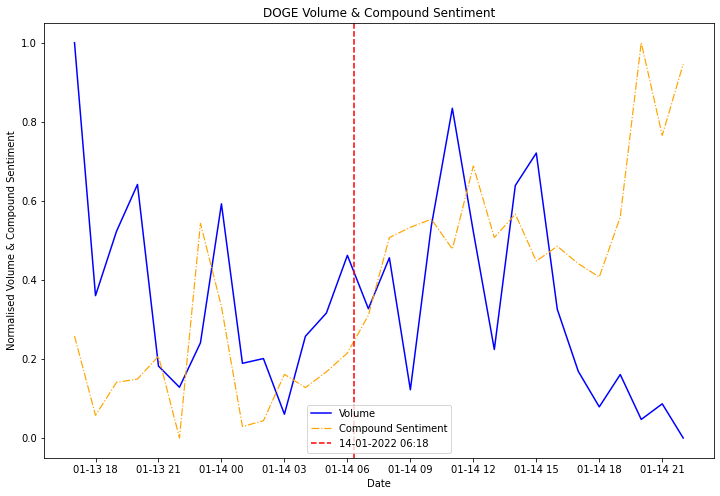

In [59]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(df['date_timestamp'], df['volume_norm'], color='blue', label='Volume', linewidth=1.5)
ax.plot(df_score['date_timestamp'], df_score['compound_norm'], color='orange', label='Compound Sentiment', linestyle='-.', linewidth=1.2)
ax.axvline(x=datetime(2022, 1, 14, 6, 18), color='red', linestyle='--', label='14-01-2022 06:18')
# ax.axvline(x=datetime(2022, 1, 25, 12, 30), color='red', linestyle='--', label='25-01-2022 12:30')
ax.set_xlabel('Date')
ax.set_ylabel('Normalised Volume & Compound Sentiment')
ax.set_title('DOGE Volume & Compound Sentiment')
plt.legend()
plt.show()

In [ ]:
# find max of score and save date_timestamp
max_score = df_merged['score_norm'].max()
max_score_date = df_merged[df_merged['score_norm'] == max_score]['date_timestamp'].values[0]
max_score_dt = dt.datetime.utcfromtimestamp(int(max_score_date)/1e9)

# find max of volume and save date_timestamp
max_volume = df_merged['volume_norm'].max()
max_volume_date = df_merged[df_merged['volume_norm'] == max_volume]['date_timestamp'].values[0]
max_volume_dt = dt.datetime.utcfromtimestamp(int(max_volume_date)/1e9)

print('Max score:', max_score, 'at', max_score_dt)
print('Max volume:', max_volume, 'at', max_volume_dt)
print('Difference between max score and max volume in hours is:', abs(max_volume_dt - max_score_dt))

In [15]:
# read C:\Users\paulc\OneDrive\Desktop\FOMO_dissertation\dissertation\25.01.2022_Mc-x-DOGE\DOGE-hour_df.csv
df_plot = read_csv('25.01.2022_Mc-x-DOGE/DOGE-hour_df.csv')
# print(df_plot.head())
# move  index column as column
df_plot.reset_index(inplace=True)

df_plot['date_timestamp'] = df_plot['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M'))

# filter data after 2022-01-25 10:00
df_plot = df_plot[df_plot['date_timestamp'] > datetime(2022, 1, 25, 10, 0)]

In [25]:
print(df_plot.head())

                date   compund  positive  negative   neutral         score  \
18  2022-01-25 11:00  0.322004  0.130431  0.008710  0.860854  8.196846e-07   
19  2022-01-25 12:00  0.269597  0.121125  0.015574  0.863311  1.497461e-07   
20  2022-01-25 13:00  0.240084  0.130987  0.023965  0.845052  4.279890e-07   
21  2022-01-25 14:00  0.236943  0.138354  0.041081  0.820502  2.115387e-07   
22  2022-01-25 15:00  0.239181  0.131939  0.023015  0.845043  2.332442e-07   

     close      date_timestamp  
18  0.1358 2022-01-25 11:00:00  
19  0.1400 2022-01-25 12:00:00  
20  0.1407 2022-01-25 13:00:00  
21  0.1388 2022-01-25 14:00:00  
22  0.1397 2022-01-25 15:00:00  


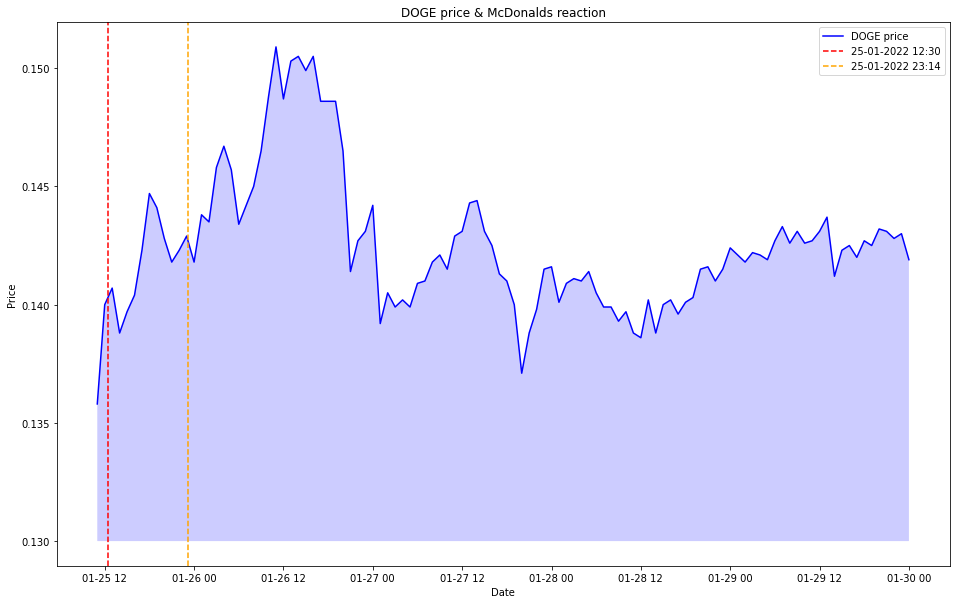

In [24]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot(df_plot['date_timestamp'], df_plot['close'], color='blue', label='DOGE price')
ax.axvline(x=datetime(2022, 1, 25, 12, 30), color='red', linestyle='--', label='25-01-2022 12:30')
ax.axvline(x=datetime(2022, 1, 25, 23, 14), color='orange', linestyle='--', label='25-01-2022 23:14')
ax.set_title('DOGE price & McDonalds reaction')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
ax.fill_between(df_plot['date_timestamp'], df_plot['close'], 0.13, facecolor='blue', alpha=0.2)
plt.show()

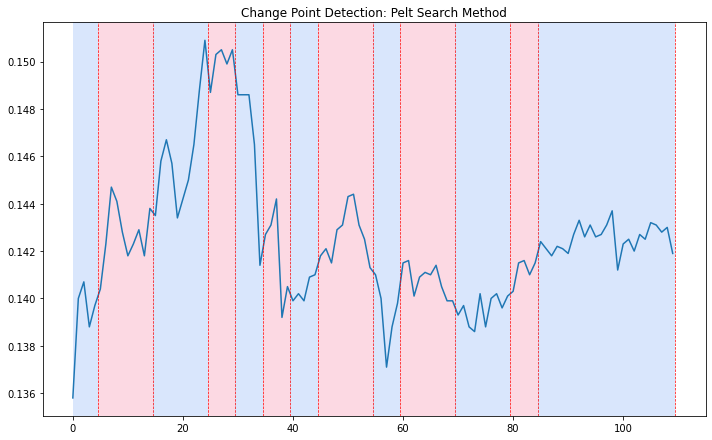

[5, 15, 25, 30, 35, 40, 45, 55, 60, 70, 80, 85, 110]


In [54]:
import ruptures as rpt
import numpy as np

def retrieve_time_series(api, series_ID):
    """ Retrieve time series data from the API.
    Parameters
    —------—
    api : API object
    series_ID : string, ID of the time series
    """
    series_search = api.data_by_series(series=series_ID)
    df = pd.DataFrame(series_search)

    return df

###############################################################################
df_plot.rename(columns={'date':'Date'}, inplace=True)
# Create a copy of merged_df to price_df
price_df = df_plot.copy()
points=np.array(price_df['close'])

# Changepoint detection with the Pelt search method. 
model="rbf"
algo = rpt.Pelt(model=model).fit(points)
result = algo.predict(pen=0.5)
# The red line is the changepoint location in the time series. 
rpt.display(points, result, figsize=(10, 6))
plt.title('Change Point Detection: Pelt Search Method')
# fill in the changepoints
for i in range(len(result)):
    plt.axvline(x=result[i]-0.5, color='red', linestyle='--', label='Changepoint', linewidth=0.7)

plt.show()  


